# 金庸的武侠世界

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#准备工作" data-toc-modified-id="准备工作-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>准备工作</a></span></li><li><span><a href="#小说概览" data-toc-modified-id="小说概览-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>小说概览</a></span><ul class="toc-item"><li><span><a href="#编码问题" data-toc-modified-id="编码问题-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>编码问题</a></span></li><li><span><a href="#查看部分小说内容" data-toc-modified-id="查看部分小说内容-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>查看部分小说内容</a></span></li></ul></li><li><span><a href="#出场人物" data-toc-modified-id="出场人物-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>出场人物</a></span></li><li><span><a href="#寻找主角光环" data-toc-modified-id="寻找主角光环-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>寻找主角光环</a></span></li><li><span><a href="#Word2Vec" data-toc-modified-id="Word2Vec-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Word2Vec</a></span></li><li><span><a href="#中文分词" data-toc-modified-id="中文分词-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>中文分词</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#相似度结果" data-toc-modified-id="相似度结果-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>相似度结果</a></span></li><li><span><a href="#人物聚类分析" data-toc-modified-id="人物聚类分析-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>人物聚类分析</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>KMeans</a></span></li><li><span><a href="#层级聚类" data-toc-modified-id="层级聚类-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>层级聚类</a></span></li><li><span><a href="#门派和武功" data-toc-modified-id="门派和武功-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>门派和武功</a></span></li></ul></li><li><span><a href="#最后" data-toc-modified-id="最后-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>最后</a></span></li></ul></div>

金庸老爷子一共写了15部武侠小说，它们分别是：

* 《飞狐外传》（1960年）
* 《雪山飞狐》（1959年）
* 《连城诀》（1963年）
* 《天龙八部》（1963年）
* 《射雕英雄传》（1957年）
* 《白马啸西风》（1961年）
* 《鹿鼎记》（1969年）
* 《笑傲江湖》（1967年）
* 《书剑恩仇录》（1955年）
* 《神雕侠侣》（1959年）
* 《侠客行》（1965年）
* 《倚天屠龙记》（1961年）
* 《碧血剑》（1956年）
* 《鸳鸯刀》（1961年）
* 《越女剑》（1970年）

今天，趁着这狂风暴雨，借着那尚存的狂妄与兴致，就用`Python`来窥探金庸的武侠世界吧

## 准备工作

* 涉及中文字符，所以我们使用` __future__ `中 `Python 3 `的特性，将所有的字符串转为 `unicode`。

In [1]:
#coding:utf-8
from __future__ import unicode_literals

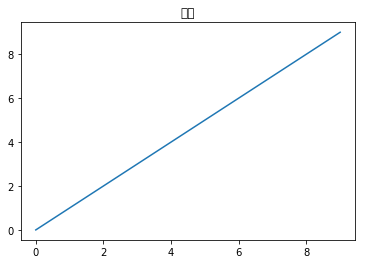

In [2]:
# 解决图像里中文字符显示的问题，Matplotlib虽然支持 
# unicode 编码，但是直接输出中文字体会出现问题。
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

x = range(10)
plt.plot(x)
plt.title("中文")
plt.show()

In [3]:
# 将字体直接放在与程序相同的目录，方便省事
from matplotlib.font_manager import FontProperties

font_simsum = FontProperties(fname="msyhbd.ttc")
# font_yahei_consolas = FontProperties(fname="msyhbd.ttc")
font_yahei_consolas = FontProperties(fname="simsun.ttc")

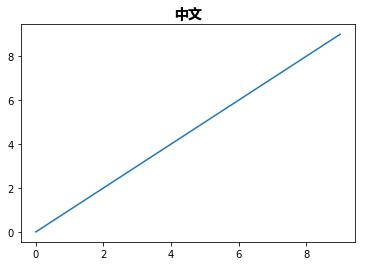

In [4]:
# 加上fontproperties参数进行设置字体
x = range(10)
plt.plot(x)
plt.title("中文", fontproperties=font_simsum, fontsize=14)
plt.show()

## 小说概览

### 编码问题

In [5]:
# 直接用ls会乱码
!ls novels

鐧介┈鍟歌タ椋�txt
纰ц�鍓�txt
椋炵嫄澶栦紶.txt
杩炲煄璇�txt
楣块紟璁�txt
灏勯洉鑻遍泟浼�txt
绁為洉渚犱荆.txt
涔﹀墤鎭╀粐褰�txt
澶╅緳鍏�儴.txt
渚犲�琛�txt
绗戝偛姹熸箹.txt
闆�北椋炵嫄.txt
鍊氬ぉ灞犻緳璁�txt
楦抽腐鍒�txt
瓒婂コ鍓�txt


In [6]:
# 查看编码
names = !ls novels
import chardet
chardet.detect(names[1])

{'confidence': 0.87625, 'encoding': 'utf-8', 'language': ''}

In [7]:
names[0]

'\xe7\x99\xbd\xe9\xa9\xac\xe5\x95\xb8\xe8\xa5\xbf\xe9\xa3\x8e.txt'

In [8]:
print names[0]

白马啸西风.txt


In [9]:
# 因为它是utf-8编码，所以指定它为utf-8
# 其实我们想要的就是utf-8
# 前面我们将ls输出的结果直接给了names,
# 相当于编码格式变成utf-8了
for name in names:
    print name.decode('utf-8')

白马啸西风.txt
碧血剑.txt
飞狐外传.txt
连城诀.txt
鹿鼎记.txt
射雕英雄传.txt
神雕侠侣.txt
书剑恩仇录.txt
天龙八部.txt
侠客行.txt
笑傲江湖.txt
雪山飞狐.txt
倚天屠龙记.txt
鸳鸯刀.txt
越女剑.txt


### 查看部分小说内容
这里我将所有小说都转码为`UTF-8-BOM`，一劳永逸

In [10]:
# 看到没有，根本不需要转码直接输出中文
with open('novels/鸳鸯刀.txt') as f:
    # 去掉结尾的换行符
    data = [line.strip() for line in f.readlines()]

for line in data[:13]:
    if line.strip():
        print line

﻿
全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing2620-1.html
更多资源下载：http://qqzone.ctdisk.com
※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※
------------------------------------------
鸳鸯刀
　　四个劲装结束、神情凶猛的汉子并肩而立，拦在当路！
　　若是黑道上山寨的强人，不会只有四个，莫非在这黑沉沉的松林之中，暗中还埋伏下大批人手？如是剪径的小贼，见了这声势浩大的镖队，远避之唯恐不及，哪敢这般大模大样地拦路挡道？难道竟是武林高手，冲着自己而来？
　　凝神打量四人：最左一人短小精悍，下巴尖削，双手分拿一对峨嵋钢刺。第二个又高又肥，便如是一座铁塔摆在地下，身前放着一块大石碑：碑上写的是“先考黄府君诚本之墓”，这自是一块墓碑了，不知放在身前有何用意？黄诚本？没曾听说江湖上有这么一位前辈高手啊！第三个中等身材，白净脸皮，若不是一副牙齿向外凸出了一寸，一个鼻头低陷了半寸，倒算得上是一位相貌英俊的人物，他手中拿的是一对流星锤。最右边的是个病夫模样的中年人，衣衫褴褛，咬着一根旱烟管，双目似睁似闭，嘴里慢慢喷着烟雾，竟没将这一队七十来人的镖队瞧在眼里。
　　那三人倒还罢了，这病夫定是个内功深湛的劲敌。顷刻之间，江湖上许多轶闻往事涌上了心头：一个白发婆婆空手杀死了五名镖头，劫走了一支大镖；一个老乞丐大闹太原府公堂，割去了知府的首级，倏然间不知去向；一个美貌大姑娘打倒了晋北大同府享名二十余年的张大拳师……越是貌不惊人、满不在乎的人物，越是武功了得，江湖上有言道：“真人不露相，露相不真人。”
　　瞧着这个闭目抽烟的病夫，陕西西安府威信镖局的总镖头、“铁鞭镇八方”周威信不由得深自踌躇，不由自主地伸手去摸了一摸背上的包袱。
　　


In [11]:
data[11]

'\xe3\x80\x80\xe3\x80\x80\xe7\x9e\xa7\xe7\x9d\x80\xe8\xbf\x99\xe4\xb8\xaa\xe9\x97\xad\xe7\x9b\xae\xe6\x8a\xbd\xe7\x83\x9f\xe7\x9a\x84\xe7\x97\x85\xe5\xa4\xab\xef\xbc\x8c\xe9\x99\x95\xe8\xa5\xbf\xe8\xa5\xbf\xe5\xae\x89\xe5\xba\x9c\xe5\xa8\x81\xe4\xbf\xa1\xe9\x95\x96\xe5\xb1\x80\xe7\x9a\x84\xe6\x80\xbb\xe9\x95\x96\xe5\xa4\xb4\xe3\x80\x81\xe2\x80\x9c\xe9\x93\x81\xe9\x9e\xad\xe9\x95\x87\xe5\x85\xab\xe6\x96\xb9\xe2\x80\x9d\xe5\x91\xa8\xe5\xa8\x81\xe4\xbf\xa1\xe4\xb8\x8d\xe7\x94\xb1\xe5\xbe\x97\xe6\xb7\xb1\xe8\x87\xaa\xe8\xb8\x8c\xe8\xba\x87\xef\xbc\x8c\xe4\xb8\x8d\xe7\x94\xb1\xe8\x87\xaa\xe4\xb8\xbb\xe5\x9c\xb0\xe4\xbc\xb8\xe6\x89\x8b\xe5\x8e\xbb\xe6\x91\xb8\xe4\xba\x86\xe4\xb8\x80\xe6\x91\xb8\xe8\x83\x8c\xe4\xb8\x8a\xe7\x9a\x84\xe5\x8c\x85\xe8\xa2\xb1\xe3\x80\x82'

**`OK`,准备工作全部完成，开始享用**

## 出场人物

接着，我们先找到金庸小说中所有出场的人物，放到 names.txt 文件中，其格式为：
```
小说1
人物1 人物2 ……
小说2
人物1 人物2 ……
小说3
人物1 人物2 ……
……
```

In [12]:
with open('names.txt') as f:
    # 去掉结尾的换行符
    data = [line.strip().decode('utf8') for line in f.readlines()]

novels = data[::2]
names = data[1::2]

novel_names = {k: v.split() for k, v in zip(novels, names)}

for name in novel_names['天龙八部'][:20]:
    print name

刀白凤
丁春秋
马夫人
马五德
小翠
于光豪
巴天石
不平道人
邓百川
风波恶
甘宝宝
公冶乾
木婉清
包不同
天狼子
太皇太后
王语嫣
乌老大
无崖子
云岛主


## 寻找主角光环

统计人物在小说中出现的次数，次数越多，主角光环的可能性越大

In [13]:
def find_main_charecters(novel, num=10):
    with open('novels/{}.txt'.format(novel)) as f:
        data = f.read().decode('utf8')
    count = []
    for name in novel_names[novel]:
        # count方法统计文中出现关键词的个数
        count.append([name, data.count(name)])
    # 对统计的个数进行从小到大排序
    count.sort(key=lambda x: x[1])
    # x[1]是统计的个数，x[0]是关键词
    
    _, ax = plt.subplots()
    numbers = [x[1] for x in count[-num:]]
    names = [x[0] for x in count[-num:]]
    ax.barh(range(num), numbers, color='red', align='center')
    ax.set_title(novel, fontsize=14, fontproperties=font_yahei_consolas)
    ax.set_yticks(range(num))
    ax.set_yticklabels(names, fontsize=14, fontproperties=font_yahei_consolas)

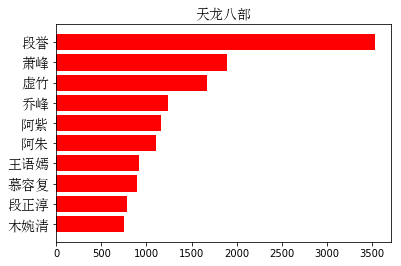

In [14]:
find_main_charecters("天龙八部")

毫无疑问，萧（乔）峰，段誉，虚竹这三兄弟的主角光环最强。

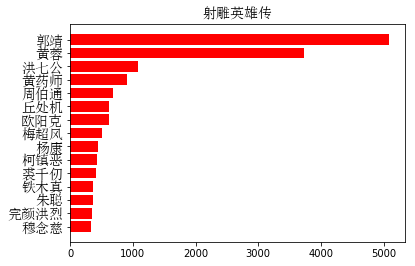

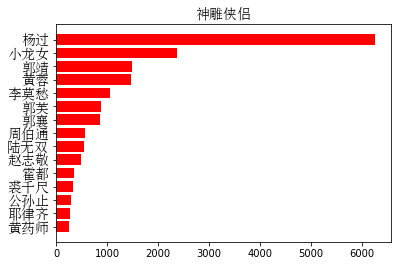

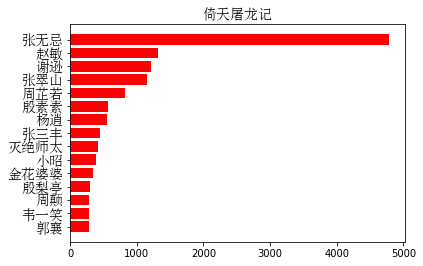

In [15]:
# 再看射雕三部曲：
find_main_charecters("射雕英雄传",num=15)
find_main_charecters("神雕侠侣",num=15)
find_main_charecters("倚天屠龙记",num=15)

## Word2Vec

接下来，使用机器学习处理这些小说，`Word2Vec` 是一款将词表征为**实数值向量**的高效工具

`gensim` 包提供了一个 `Python `版的实现。

* 源代码地址：https://github.com/RaRe-Technologies/gensim
* 官方文档地址：http://radimrehurek.com/gensim/

In [16]:
!pip2 install gensim

  Running setup.py install for bz2file: started
    Running setup.py install for bz2file: finished with status 'done'
  Running setup.py install for smart-open: started
    Running setup.py install for smart-open: finished with status 'done'


In [17]:
import gensim

d:\python\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 中文分词

虽然我们安装了 `gensim`，但我们还不可以直接使用它来进行 `Word2Vec` 的操作，因为 `Word2Vec` 中的词默认是用空格分隔的，而中文小说显然不符合这个要求，为此，我们需要对中文进行分词。

* 一个比较好用的 `Python `中文分词包叫做 `jieba` （结巴）。
* 源代码地址：https://github.com/fxsjy/jieba

In [18]:
!pip2 install jieba

  Running setup.py install for jieba: started
    Running setup.py install for jieba: finished with status 'done'


`jieba` 包具有识别新词的能力，不过为了得到更准确的分词结果，我们可以将人名导入 `jieba `库的字典，除此之外，我们还加入门派和武功的专有名词：

In [20]:
import jieba

for _, names in novel_names.iteritems():
    for name in names:
        jieba.add_word(name)
        
with open("kungfu.txt") as f:
    kungfu_names = [line.decode('utf8').strip() for line in f.readlines()]
    
with open("bangs.txt") as f:
    bang_names = [line.decode('utf8').strip() for line in f.readlines()]

for name in kungfu_names:
    jieba.add_word(name)

for name in bang_names:
    jieba.add_word(name)

Building prefix dict from the default dictionary ...
Dumping model to file cache c:\users\alien\appdata\local\temp\jieba.cache
Loading model cost 1.926 seconds.
Prefix dict has been built succesfully.


In [21]:
novels = ["书剑恩仇录", 
          "天龙八部",
          "碧血剑",
          "越女剑",
          "飞狐外传",
          "侠客行",
          "射雕英雄传",
          "神雕侠侣",
          "连城诀",
          "鸳鸯刀",
          "倚天屠龙记",
          "白马啸西风",
          "笑傲江湖",
          "雪山飞狐",
          "鹿鼎记"]

In [22]:
# 我们按照段落处理文本：
sentences = []

for novel in novels:
    print "处理：{}".format(novel)
    with open('novels/{}.txt'.format(novel)) as f:
        data = [line.decode('utf8').strip() for line in f.readlines() if line.decode('utf8').strip()]
    for line in data:
        words = list(jieba.cut(line))
        sentences.append(words)

处理：书剑恩仇录
处理：天龙八部
处理：碧血剑
处理：越女剑
处理：飞狐外传
处理：侠客行
处理：射雕英雄传
处理：神雕侠侣
处理：连城诀
处理：鸳鸯刀
处理：倚天屠龙记
处理：白马啸西风
处理：笑傲江湖
处理：雪山飞狐
处理：鹿鼎记


## 训练模型

默认参数进行训练：

In [23]:
model = gensim.models.Word2Vec(sentences, size=100, window=5, 
                               min_count=5, workers=4)

In [25]:
# 把训练好的模型存到本地：
model.save("louis_cha.model")

In [26]:
# 从本地磁盘上读取模型：
model = gensim.models.Word2Vec.load("louis_cha.model")

## 相似度结果

有了模型，我们可以进行一些简单而有趣的测试。

首先看与乔峰相似的人：

In [27]:
for k, s in model.most_similar(positive=["乔峰", "萧峰"]):
    print k, s

段正淳 0.809722900391
袁承志 0.800065279007
慕容复 0.781261503696
虚竹 0.756120979786
贝海石 0.753567934036
陆菲青 0.745371520519
余鱼同 0.74504005909
游坦之 0.735625803471
郭靖 0.724317908287
石清 0.722411096096


d:\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
d:\python\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


出来的都是出场较多的男性人物。

再看看与阿朱相似的人：

In [28]:
for k, s in model.most_similar(positive=["阿朱"]):
    print k, s

香香公主 0.824596166611
阿紫 0.822803199291
霍青桐 0.807661950588
钟灵 0.783306956291
青青 0.77570104599
王语嫣 0.774145066738
段誉 0.765325903893
木婉清 0.75617235899
钟夫人 0.755634665489
盈盈 0.7547519207


d:\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [29]:
# 看一下门派相似度
for k, s in model.most_similar(positive=["丐帮"]):
    print k, s

天地会 0.855765283108
恒山派 0.826427996159
红花会 0.822755873203
嵩山派 0.819723367691
长乐帮 0.816457748413
魔教 0.809515535831
峨嵋派 0.806672990322
门人 0.783760368824
全真教 0.773151934147
铁掌帮 0.773064911366


d:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [30]:
# 还可以看看武功秘籍：
for k, s in model.most_similar(positive=["降龙十八掌"]):
    print k, s

太极拳 0.926375150681
空明拳 0.902564883232
一阳指 0.883243978024
打狗棒法 0.878203451633
落英 0.870422661304
桃华 0.86389040947
般若掌 0.858271181583
绝招 0.857797622681
蛤蟆功 0.846309483051
独孤九剑 0.845499455929


d:\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


在 Word2Vec 的模型里，有过“中国-北京=法国-巴黎”的例子，这里我们也可以找到这样的例子：

In [31]:
def find_relationship(a, b, c):
    """
    返回 d
    a与b的关系，跟c与d的关系一样
    """
    d, _ = model.most_similar(positive=[c, b], negative=[a])[0]
    print "给定“{}”与“{}”，“{}”和“{}”有类似的关系".format(a, b, c, d)

find_relationship("段誉", "段公子", "乔峰")

给定“段誉”与“段公子”，“乔峰”和“乔帮主”有类似的关系


d:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [32]:
# 类似的：

# 情侣对
find_relationship("郭靖", "黄蓉", "杨过")

# 岳父女婿
find_relationship("令狐冲", "任我行", "郭靖")

# 非情侣
find_relationship("郭靖", "华筝", "杨过")

给定“郭靖”与“黄蓉”，“杨过”和“小龙女”有类似的关系
给定“令狐冲”与“任我行”，“郭靖”和“袁士霄”有类似的关系
给定“郭靖”与“华筝”，“杨过”和“郭芙”有类似的关系


d:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [33]:
# 韦小宝
find_relationship("杨过", "小龙女", "韦小宝")
find_relationship("令狐冲", "盈盈", "韦小宝")
find_relationship("张无忌", "赵敏", "韦小宝")

给定“杨过”与“小龙女”，“韦小宝”和“康熙”有类似的关系
给定“令狐冲”与“盈盈”，“韦小宝”和“康熙”有类似的关系
给定“张无忌”与“赵敏”，“韦小宝”和“康熙”有类似的关系


d:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


**惊了！！！简直不敢相信，韦小宝TM喜欢男的。。。**

In [34]:
# 门派武功之间的关系：
find_relationship("郭靖", "降龙十八掌", "黄蓉")
find_relationship("武当", "张三丰", "少林")
find_relationship("任我行", "魔教", "令狐冲")

给定“郭靖”与“降龙十八掌”，“黄蓉”和“太极拳”有类似的关系
给定“武当”与“张三丰”，“少林”和“任我行”有类似的关系
给定“任我行”与“魔教”，“令狐冲”和“恒山派”有类似的关系


d:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


## 人物聚类分析

之前我们对文本进行 `Word2Vec` 的结果，是将一个中文词组，映射到了一个向量空间，因此，我们可以利用这个向量表示的空间，对这些词进行聚类分析。

因为全部小说中的人物太多，所以从单本小说进行入手：

In [35]:
all_names = []
word_vectors = None

for name in novel_names["天龙八部"]:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

d:\python\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """
d:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
d:\python\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


### KMeans

聚类我们可以使用很多方法，这里我们用 scikit-learn 自带的几种聚类方法进行聚类。

先考虑 `Kmeans`：

In [37]:
!pip install sklearn

  Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [38]:
from sklearn.cluster import KMeans

如果只分成3类，那么很明显地可以将众人分成主角，配角，跑龙套的三类：

In [39]:
N = 3
label = KMeans(N).fit(word_vectors).labels_

for c in range(N):
    print "\n类别{}：".format(c+1)
    for idx, name in enumerate(all_names[label==c]):
        print name,
        if idx % 10 == 9:
            print 
    print


类别1：
刀白凤 丁春秋 马夫人 巴天石 邓百川 风波恶 公冶乾 包不同 乌老大 云中鹤
白世镜 本因 过彦之 司马林 玄慈 玄寂 玄难 叶二娘 左子穆 李秋水
全冠清 阮星竹 朱丹臣 阿碧 鸠摩智 耶律洪基 苏星河 段延庆 范骅 华赫艮
赵钱孙 钟万仇 秦红棉 徐长老 崔百泉 萧远山 褚万里 慕容博 谭婆 薛慕华


类别2：
马五德 小翠 不平道人 甘宝宝 天狼子 太皇太后 无崖子 云岛主 天山童姥 本参
本观 本相 出尘子 冯阿三 古笃诚 兰剑 平婆婆 石嫂 司空玄 玄苦
玄生 玄痛 耶律莫哥 李春来 李傀儡 刘竹庄 朴者和尚 许卓诚 竹剑 阿洪
阿胜 陈孤雁 来福儿 努儿海 宋长老 苏辙 吴长风 辛双清 严妈妈 余婆婆
岳老三 张全祥 单伯山 单季山 单小山 单正 段正明 宗赞王子 苟读 郁光标
卓不凡 范百龄 哈大霸 梦姑 神山上人 神音 室里 姚伯当 幽草 龚光杰
贾老者 康广陵 容子矩 桑土公 奚长老 诸保昆 崔绿华 符敏仪 菊剑 梅剑
游骥 游驹 傅思归 葛光佩 缘根 鲍千灵 智光大师 瑞婆婆 谭公 赫连铁树
谭青 摘星子 慧方 慧观 慧净 慧真 穆贵妃 吴领军 易大彪

类别3：
木婉清 王语嫣 乔峰 萧峰 阿朱 阿紫 段誉 段正淳 钟灵 虚竹
游坦之 慕容复


我们把众龙套去掉：

In [40]:
N = 4
c = sp.stats.mode(label).mode
remain_names = all_names[label!=c]
remain_vectors = word_vectors[label!=c]

remain_label = KMeans(N).fit(remain_vectors).labels_

for c in range(N):
    print "\n类别{}：".format(c+1)
    for idx, name in enumerate(remain_names[remain_label==c]):
        print name,
        if idx % 10 == 9:
            print 
    print


类别1：
丁春秋 乔峰 萧峰 鸠摩智 段正淳 游坦之 慕容复

类别2：
巴天石 邓百川 公冶乾 本因 过彦之 玄慈 玄寂 玄难 朱丹臣 阿碧
耶律洪基 范骅 华赫艮 徐长老 褚万里

类别3：
刀白凤 马夫人 风波恶 包不同 乌老大 云中鹤 白世镜 司马林 叶二娘 左子穆
李秋水 全冠清 阮星竹 苏星河 段延庆 赵钱孙 钟万仇 秦红棉 崔百泉 萧远山
慕容博 谭婆 薛慕华

类别4：
木婉清 王语嫣 阿朱 阿紫 段誉 钟灵 虚竹


可以看到，段家的儿子和女儿倾向于聚在一起，而反派角色则倾向于被聚在一起

### 层级聚类

In [41]:
# 换一本小说
all_names = []
word_vectors = None

for name in novel_names["倚天屠龙记"]:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

d:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
d:\python\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
d:\python\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


这次采用层级聚类的方式，调用的是 `Scipy `中层级聚类的包：

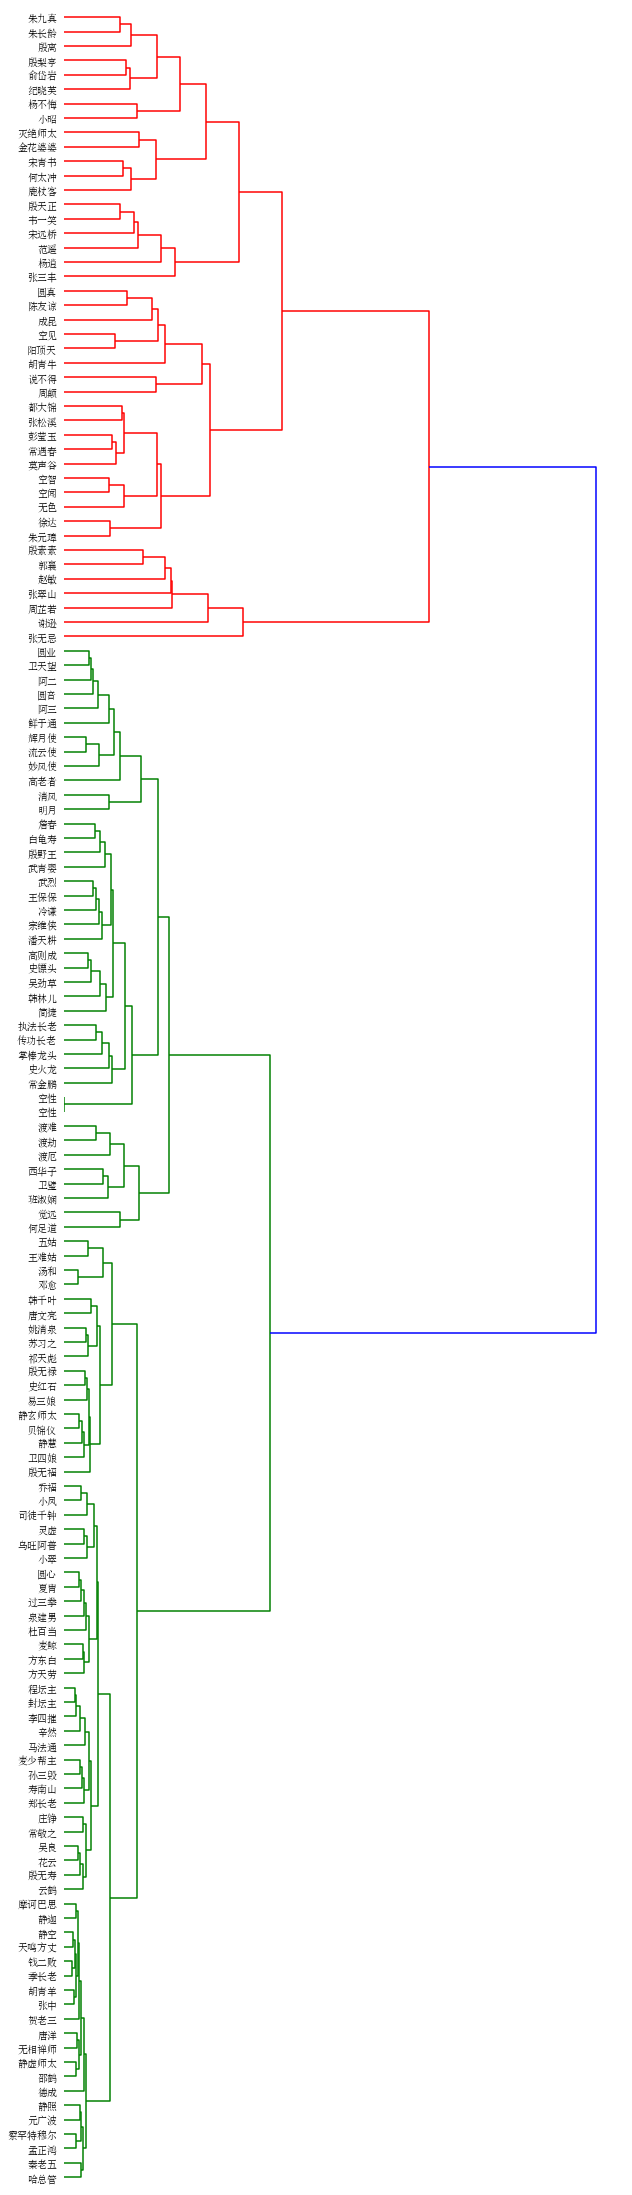

In [43]:
import scipy.cluster.hierarchy as sch
Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 40))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

### 门派和武功

d:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  after removing the cwd from sys.path.
d:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
d:\python\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


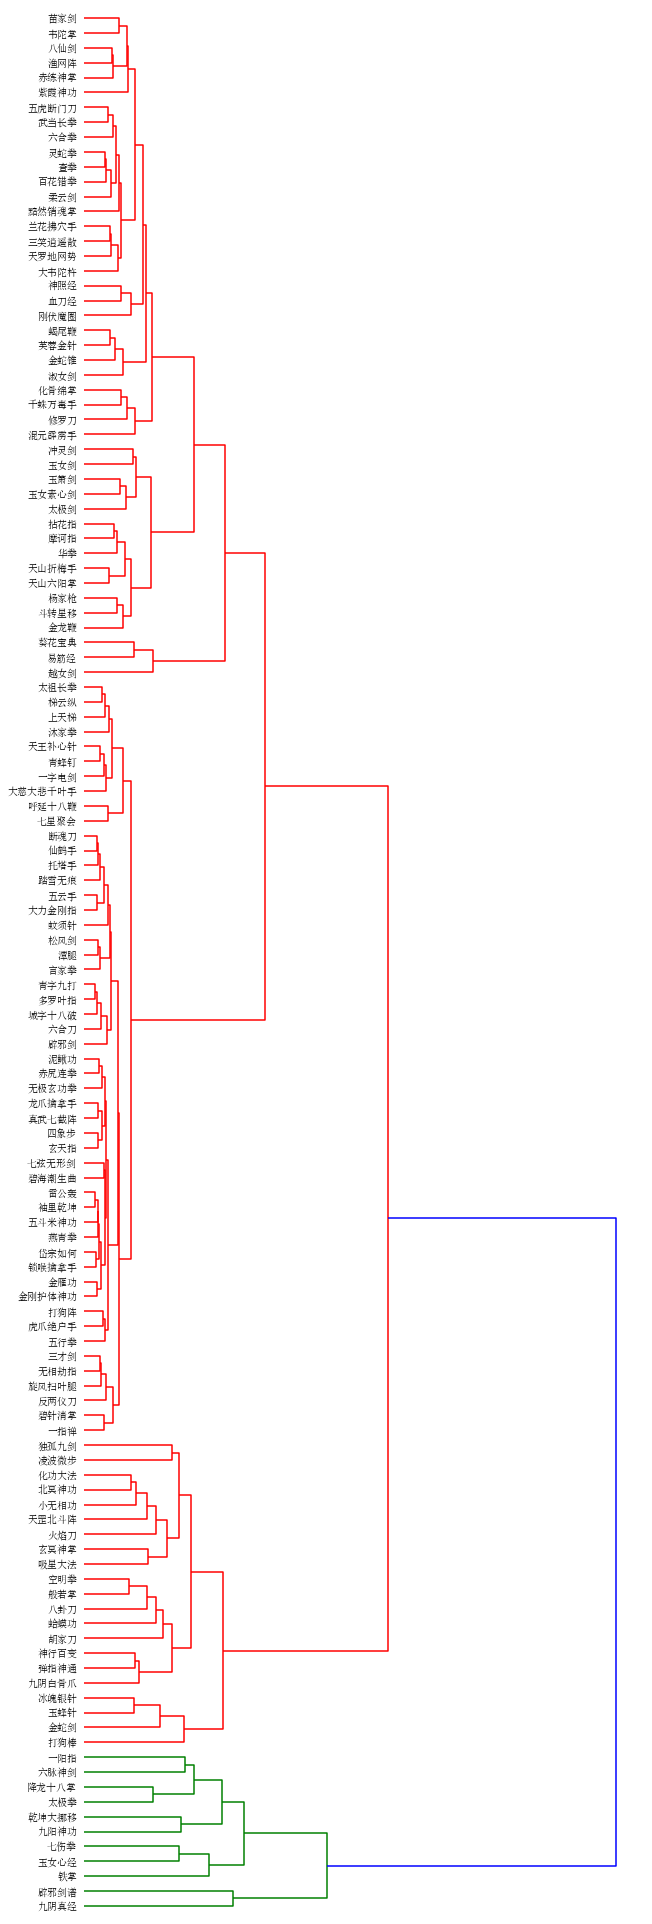

In [44]:
all_names = []
word_vectors = None
for name in kungfu_names:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 35))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

可以认为，一部分是主角比较厉害的武功，比较多的那部分只能算是配角们的武功。

再来就是门派的聚类：

d:\python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  after removing the cwd from sys.path.
d:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
d:\python\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


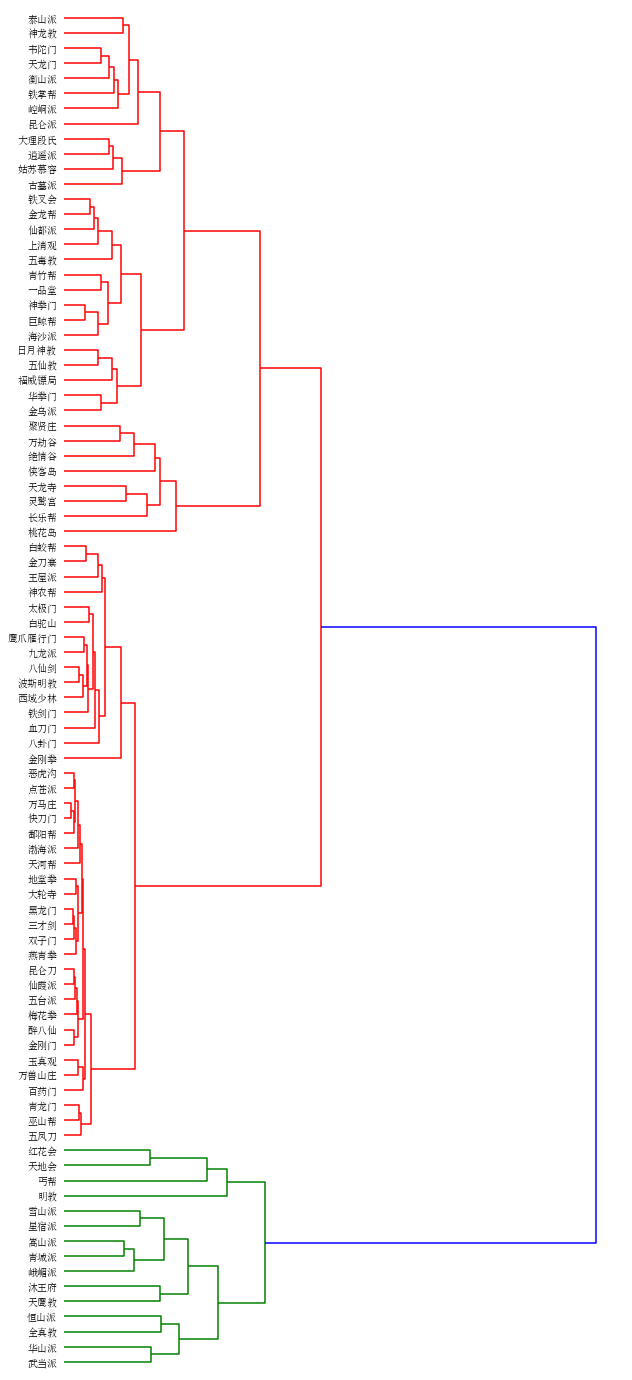

In [45]:
all_names = []
word_vectors = None
for name in bang_names:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 25))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

比较少的这一类，基本都是在某几部小说中出现的主要门派，而大多数门派都是打酱油的。

## 最后

> 飞雪连天射白鹿，笑书神侠倚碧鸳。

本文来自：[金庸的武侠世界](http://nbviewer.jupyter.org/github/lijin-THU/notes-python/blob/master/10-something-interesting/10.04-louis-cha%27s-kungfu-world.ipynb)